# Tendencias de éxito en la Industria de Videojuegos: Análisis de Datos para Campañas Publicitarias en Ice Online Store

##  Introducción

La tienda online Ice se enfrenta al emocionante desafío de analizar datos en el mundo de los videojuegos. Contamos con una amplia gama de información, desde reseñas de usuarios y expertos hasta datos de ventas históricas, disponibles en fuentes abiertas. Nuestro objetivo es identificar patrones que ayuden a determinar el éxito de un juego, lo que permitirá descubrir proyectos prometedores y planificar campañas publicitarias efectivas.

Con datos que se remontan a 2016, nos encontramos en diciembre de ese año, preparándonos para una campaña para el próximo año. En este proyecto, estamos centrados en adquirir experiencia valiosa en el análisis de datos en la industria de los videojuegos. Ya sea que estemos pronosticando las ventas para 2017 basándonos en datos de 2016 o mirando hacia el futuro para prever las ventas en 2027 con datos de 2026, el objetivo del proyecto es aprender y mejorar nuestra comprensión de los datos.

El conjunto de datos que estamos utilizando incluye una columna "rating" que almacena la clasificación ESRB de cada juego. Esta clasificación, proporcionada por el Entertainment Software Rating Board, evalúa el contenido de un juego y asigna una clasificación de edad, como Adolescente o Adulto. Este aspecto nos brinda una perspectiva adicional sobre el contenido y la audiencia de cada juego, enriqueciendo nuestro análisis y nuestras decisiones estratégicas.






## Diccionario de Datos

Este conjunto de datos contiene información sobre videojuegos, incluyendo su nombre, plataforma de lanzamiento, año de lanzamiento, género, ventas en diferentes regiones del mundo, puntuaciones de críticos y usuarios, y la clasificación ESRB.

- **Name (Nombre):** Nombre del juego.
- **Platform (Plataforma):** Plataforma en la que se lanzó el juego.
- **Year_of_Release (Año de lanzamiento):** Año de lanzamiento del juego.
- **Genre (Género):** Género del juego.
- **NA_sales (Ventas en Norteamérica):** Ventas en Norteamérica en millones de dólares estadounidenses.
- **EU_sales (Ventas en Europa):** Ventas en Europa en millones de dólares estadounidenses.
- **JP_sales (Ventas en Japón):** Ventas en Japón en millones de dólares estadounidenses.
- **Other_sales (Ventas en Otros Países):** Ventas en otros países en millones de dólares estadounidenses.
- **Critic_Score (Puntuación de los Críticos):** Puntuación de los críticos (máximo de 100).
- **User_Score (Puntuación de los Usuarios):** Puntuación de los usuarios (máximo de 10).
- **Rating (Clasificación ESRB):** Clasificación ESRB del juego:

1. 'EC': Early Childhood (Para niños pequeños)

2. 'E': Everyone (Para todos)

3. 'E10+': Everyone 10 and older (Para todos mayores de 10 años)

4. 'T': Teen (Adolescentes)

5. 'M': Mature (Mature) (Mature) (Para mayores de 17 años)

6. 'AO': Adults Only (Solo para adultos) (Solo para mayores de 18 años)

7. 'RP': Rating Pending (Calificación pendiente)

8. K-A: Kids to Adults (De niños a adultos)

###  Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats


###  Cargar datos

In [2]:
# Cargar el archivo de datos en un DataFrame

games_df = pd.read_csv("games.csv")

games_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Preparar los datos

En esta fase, nos ocuparemos de preparar nuestros datos para el análisis posterior. Para ello, es crucial asegurarnos de que los datos estén en el formato adecuado y libres de errores. Primero, convertiremos los datos en los tipos necesarios para facilitar su manipulación y análisis. Luego, identificaremos y corregiremos cualquier error presente en los datos, asegurándonos de abordarlos de manera adecuada y documentar nuestras acciones. Este proceso de limpieza y preparación es fundamental para garantizar la calidad y confiabilidad de nuestros análisis posteriores.

### Ajustar tipos de datos

In [3]:
#Imprimir una muestra de los datos 

games_df.sample(5,random_state=25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4518,Cool Boarders,PS,1996.0,Sports,0.10,0.07,0.24,0.03,NaN,NaN,NaN
15038,Ano Hi Mita Hana no Namae o Bokutachi wa Mada ...,PSP,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4938,Auto Modellista,PS2,2002.0,Racing,0.19,0.15,0.00,0.05,66.0,7.5,E
1121,Ghosts 'n Goblins,NES,1986.0,Action,0.74,0.26,0.61,0.03,NaN,NaN,NaN
10547,Creeper World 3: Arc Eternal,Wii,2009.0,Strategy,0.00,0.00,0.10,0.00,NaN,NaN,NaN


In [4]:
#Cambiar a minúsculas los nombres de las columnas en el DataFrame

games_df.columns = map(str.lower, games_df.columns)

games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Reemplazar 'tbd' por NaN en la columna 'user_score'
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

# Convertir la columna 'user_score' a tipo de dato numérico
games_df['user_score'] = pd.to_numeric(games_df['user_score'])



Se han cambiado los tipos de datos de las columnas 'user_score' de str a float. En este caso, necesitamos la puntuación de los usuarios como valores numéricos para poder realizar comparaciones y cálculos. Los valores 'tbd' se cambiaron por NaN igualmente para permitir cálculos.

### Valores duplicados

In [6]:
# Contar el número total de filas duplicadas en el DataFrame
num_duplicados = games_df.duplicated().sum()

print(f"Número total de filas duplicadas: {num_duplicados}")

Número total de filas duplicadas: 0


### Valores ausentes por columna

In [7]:
#Explorar los valores nulos

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [8]:
#Valores nulos en la columna "name"
games_df.loc[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#Valores nulos en la columna "genre"
games_df.loc[games_df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


En las columnas 'platform', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales' y 'other_sales', los valores están completos. En las columnas 'name' y 'genre' faltan 2 valores, lo que indica que no se han registrado el nombre ni el género de dos videojuegos, posiblemente debido a la antigüedad de los mismos. Estos juegos datan de 1993, por lo que puede que no se haya podido recuperar la información. Por otro lado, en 'critic_score', 'user_score' y 'rating', hay una cantidad considerable de valores ausentes. Esto puede deberse a que los videojuegos no habían sido evaluados en el momento de la recopilación de datos.

In [10]:
#crear una nueva columna para las ventas totales 
games_df["total_sales"] = games_df["na_sales"] + games_df["eu_sales"] + games_df["jp_sales"] +games_df["other_sales"]

games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Análisis de Datos

A través de un enfoque estructurado, exploraremos diversas facetas del mercado de los videojuegos, desde la evolución histórica hasta las tendencias actuales, con el objetivo de extraer conocimientos valiosos que guíen nuestras decisiones y estrategias. En este contexto, dividimos nuestro análisis en varios apartados para abordar diferentes aspectos clave del mercado de los videojuegos y sus implicaciones en la industria.

4.1 Exploración de los lanzamientos por año.

4.2 Variabilidad de las ventas y Ciclo de vida de las plataformas.

4.3 Selección de datos para construir un modelo para 2017.

   4.3.1 Explorando el Potencial de las Plataformas más Nuevas
   4.3.2 Explorando el Potencial de las Plataformas líderes en ventas

4.4 Relación entre reseñas y ventas.

4.5 Distribución de juegos por género.

4.6 Creación de Perfil de Usuario por Región.

   4.6.1 Distribución de las plataformas más populares por región
   4.6.2 Distribución de los géneros más populares por región
   4.6.3 Impacto de las Clasificaciones de ESRB en Ventas

A través de este análisis exhaustivo, esperamos obtener una comprensión más profunda de los factores que impulsan el éxito en la industria de los videojuegos y, al mismo tiempo, identificar oportunidades clave para la toma de decisiones estratégicas informadas.

### Exploración de los lanzamientos por año:

El primer paso nos lleva a examinar la cantidad de juegos lanzados en diferentes años, preguntándonos si estos datos son significativos en términos de su relevancia histórica y su impacto en la industria. Este análisis inicial nos proporcionará una visión general del crecimiento y la transformación del mercado a lo largo del tiempo.

In [11]:
#Obtener el número de ventas por año
sells_per_year = games_df["year_of_release"].value_counts().sort_index()

sells_per_year

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

Text(0, 0.5, 'Número de Ventas')

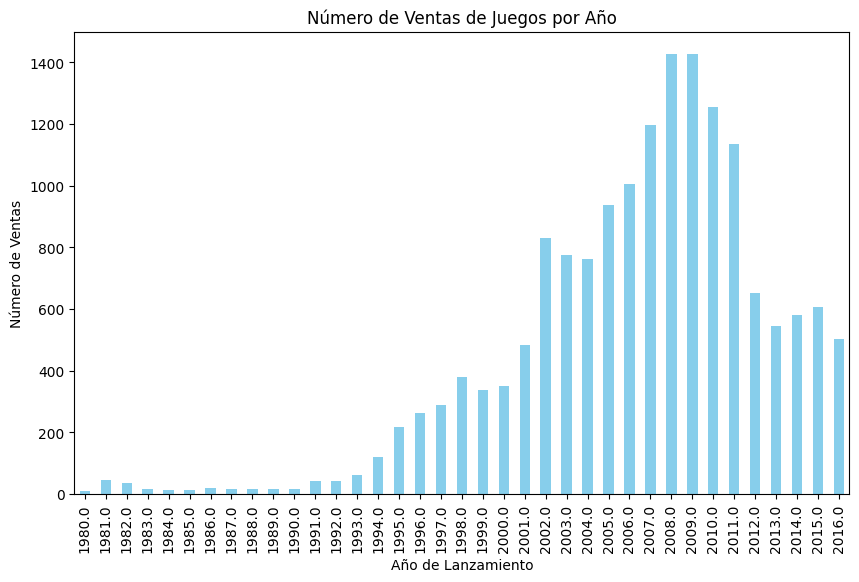

In [12]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
sells_per_year.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Número de Ventas de Juegos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Ventas')


### Variabilidad de las ventas y Ciclo de vida de las plataformas:

Exploraremos la evolución anual de estas ventas, identificando tendencias emergentes y examinando las plataformas que han perdido popularidad con el tiempo. También investigaremos el tiempo que tardan en surgir nuevas plataformas y desaparecer las antiguas, lo que nos permitirá comprender mejor el ciclo de vida de las plataformas en el mercado de los videojuegos.

In [13]:
# Agrupar los datos por plataforma y calcular las ventas totales
games_df_by_platform = games_df.groupby('platform').sum()

# Seleccionar las 5 plataformas más populares ordenando el DataFrame agrupado por plataforma por las ventas totales en orden descendente,
# tomando las primeras 5 filas y obteniendo los índices (nombres de las plataformas)
top_platforms = games_df_by_platform.sort_values(by="total_sales", ascending=False).head(5).index

# Filtrar los datos originales para incluir solo las ventas de las 5 plataformas más populares
top_platforms_data = games_df[games_df['platform'].isin(top_platforms)]

# Mostrar las 5 plataformas más populares seleccionadas
top_platforms


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

In [14]:
# Filtrar los datos originales (games_df) para incluir solo las filas donde la plataforma ('platform') se encuentra en la lista de las 5 plataformas más populares (top_platforms)
top_platforms_data = games_df[games_df['platform'].isin(top_platforms)]



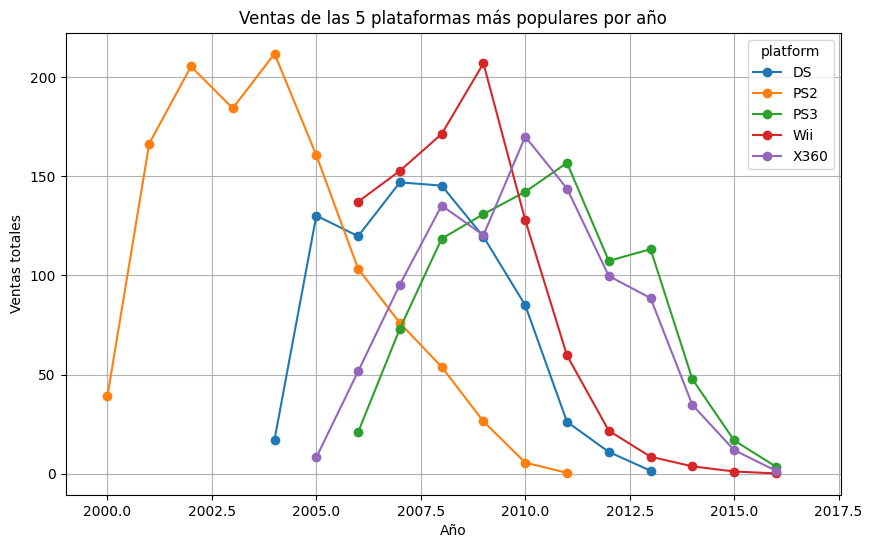

In [15]:
# Agrupar los datos filtrados por año de lanzamiento y plataforma, y sumar las ventas en cada grupo
sales_by_year_and_platform = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Crear el gráfico de líneas múltiples
sales_by_year_and_platform.plot(kind='line', marker='o', figsize=(10, 6))

# Ajustar los límites del eje x para que comience en el año 2000
plt.xlim(left=1999)



# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.title('Ventas de las 5 plataformas más populares por año')

# Mostrar el gráfico
plt.grid(True)

En el gráfico, se puede observar que las ventas aumentan hasta el cuarto o quinto año y luego comienzan a disminuir.

### Selección de datos para construir un modelo para 2017:

Con un enfoque en los datos relevantes para construir un modelo para el año 2017, examinaremos las plataformas líderes en ventas, identificaremos aquellas que están experimentando un crecimiento significativo y exploraremos posibles oportunidades de inversión.


#### Explorando el Potencial de las Plataformas más Nuevas

Al observar que las plataformas con más ventas tienen un éxito mayor, especialmente en sus primeros 5 años de vida, decidimos explorar las plataformas más nuevas con 5 años o menos:

In [16]:
actual_year =2016
# Calcular la antigüedad mínima de los juegos de cada plataforma
min_years_by_platform = games_df.groupby('platform')['year_of_release'].min()

# Identificar las plataformas con antigüedad mínima mayor a 5 años
excluded_platforms = min_years_by_platform[min_years_by_platform < actual_year - 5].index

# Filtrar el DataFrame original para excluir las plataformas identificadas
filtered_df = games_df[~games_df['platform'].isin(excluded_platforms)]

# Mostrar las primeras filas del DataFrame filtrado
filtered_df.head()

filtered_df["platform"].unique()


array(['PS4', '3DS', 'XOne', 'WiiU', 'PSV'], dtype=object)

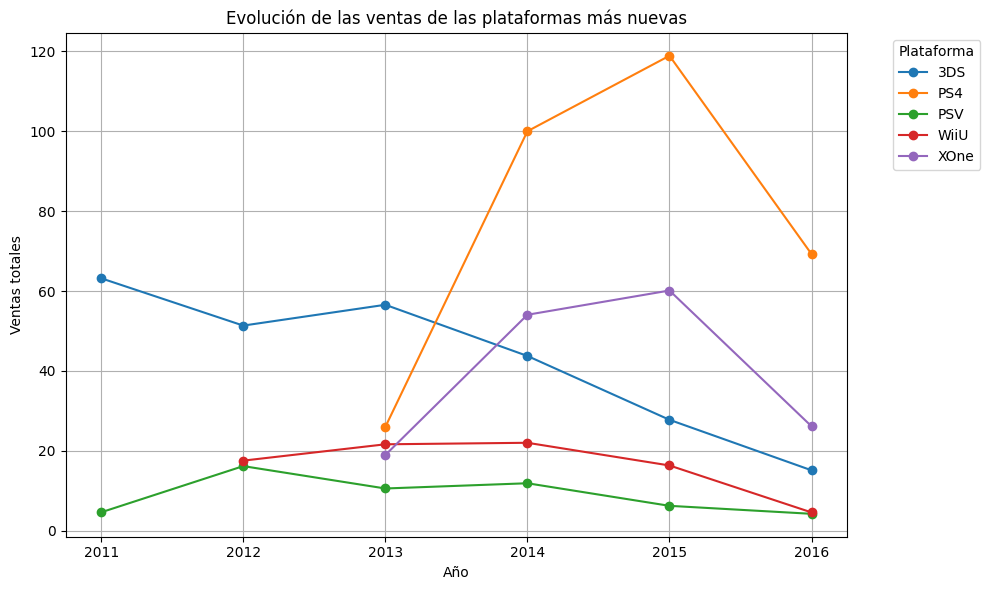

In [17]:
# Agrupar los datos por año y plataforma para calcular las ventas totales de cada plataforma en cada año
sales_by_year_platform = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Crear un gráfico de líneas múltiples
sales_by_year_platform.plot(kind='line', marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Evolución de las ventas de las plataformas más nuevas')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()

El gráfico muestra la tendencia de ventas de las plataformas más nuevas desde 2011 hasta 2016. El 3DS ha experimentado una disminución constante en sus ventas desde su lanzamiento, mientras que el PS4 y el XOne, siendo las más recientes de todas, mostraron un crecimiento notable en sus ventas hasta 2015. La WiiU mantuvo un nivel relativamente estable en sus ventas, con una ligera disminución en los últimos dos años. Por otro lado, el PSV experimentó un aumento en sus ventas en el primer año, seguido de una tendencia a la baja en los años posteriores. Cabe destacar que en 2016 todas las plataformas presentaron una disminución en sus ventas con respecto al año anterior

#### Explorando el Potencial de las Plataformas líderes en ventas

Al notar que las plataformas líderes en ventas suelen experimentar un éxito significativo, especialmente durante los primeros años de su existencia, optamos por investigar más a fondo estas plataformas destacadas, centrándonos específicamente en aquellas con las mayores ventas en el año 2016.

In [18]:
# Filtrar los datos para incluir solo los años desde 5 años antes de 2016 hasta 2016
relevant_years = range(2011, 2017)  # Desde 2011 hasta 2016
relevant_data = games_df[games_df['year_of_release'].isin(relevant_years)]

# Identificar las plataformas líderes en ventas en 2016
sales_2016 = relevant_data[relevant_data['year_of_release'] == 2016].groupby('platform')['total_sales'].sum()
top_platforms_2016 = sales_2016.nlargest(5).index

# Filtrar los datos para incluir solo las plataformas líderes en ventas en 2016
top_platforms_data_2016 = relevant_data[relevant_data['platform'].isin(top_platforms_2016)]

# Agrupar los datos por año y plataforma y sumar las ventas
sales_by_year_platform_2016 = top_platforms_data_2016.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales_by_year_platform_2016

platform,3DS,PC,PS4,WiiU,XOne
year_of_release,,,,,
2011.0,63.20,35.03,NaN,NaN,NaN
2012.0,51.36,23.22,NaN,17.56,NaN
2013.0,56.57,12.38,25.99,21.65,18.96
2014.0,43.76,13.28,100.00,22.03,54.07
2015.0,27.78,8.52,118.90,16.35,60.14
2016.0,15.14,5.25,69.25,4.60,26.15


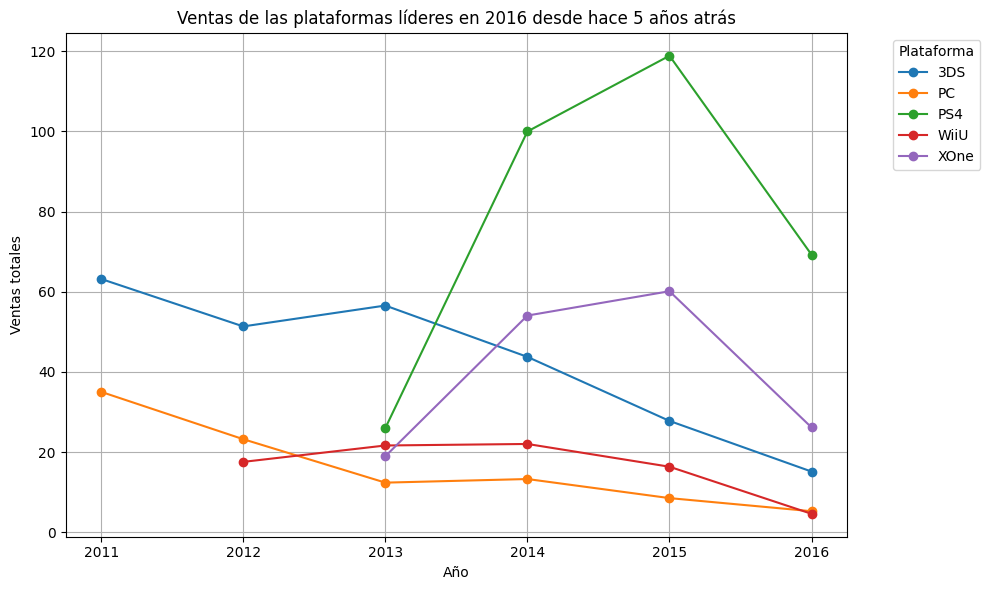

In [19]:
# Crear el gráfico de líneas múltiples
sales_by_year_platform_2016.plot(kind='line', marker='o', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Ventas de las plataformas líderes en 2016 desde hace 5 años atrás')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()

El gráfico revela que las plataformas líderes en ventas en 2016 coinciden con las más recientes, con la excepción de la PC, que a pesar de ser más antigua, sigue liderando en ventas. Sin embargo, el PSV se encuentra ausente de este grupo destacado. Las ventas en PC han disminuido paulatinamente desde el 2011.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PS4'),
  Text(1, 0, '3DS'),
  Text(2, 0, 'PC'),
  Text(3, 0, 'XOne'),
  Text(4, 0, 'WiiU')])

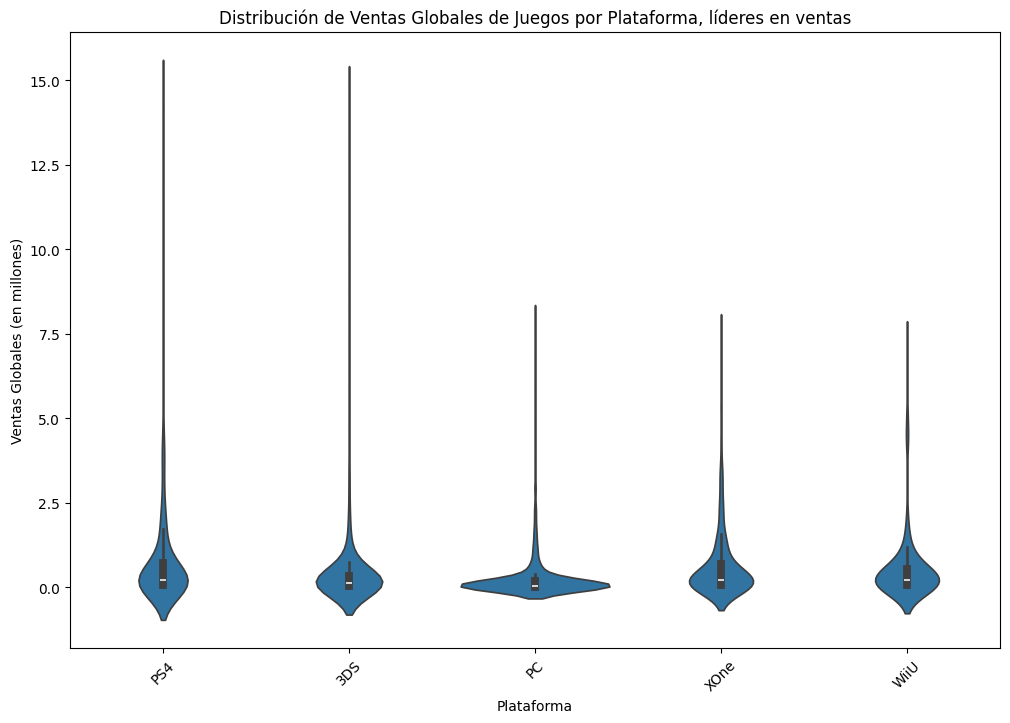

In [20]:
# Seleccionar solo las plataformas deseadas
selected_platforms = ['3DS', 'PC', 'PS4', 'WiiU', 'XOne']
selected_platforms_df = games_df[games_df['platform'].isin(selected_platforms)]

# Crear el diagrama de violín
plt.figure(figsize=(12, 8))
sns.violinplot(x="platform", y="total_sales", data=selected_platforms_df)
plt.title('Distribución de Ventas Globales de Juegos por Plataforma, líderes en ventas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para una mejor visualización


El gráfico de violín revela que las plataformas tienen una media muy similar en cuanto a ventas, y la forma de los violines es bastante similar, con los datos agrupados alrededor de la media. Sin embargo, existen algunas diferencias notables entre ellas. Por ejemplo, tanto PS4 como 3DS muestran violines que se extienden más hacia arriba, con más valores atípicos que alcanzan hasta 15. Por otro lado, las otras tres plataformas (PC, WiiU y XOne) tienen violines que se extienden hasta alrededor de 7.5. Es interesante destacar que el violin de ventas de PC muestra una mayor concentración alrededor de su media, lo que sugiere una distribución más uniforme de las ventas en comparación con las otras plataformas.

**Desviación estándar:**

In [21]:
# Calcular la desviación estándar de las ventas para las plataformas seleccionadas
std_sales = selected_platforms_df.groupby('platform')['total_sales'].std()

std_sales

platform
3DS     1.430876
PC      0.675577
PS4     1.609456
WiiU    1.058836
XOne    1.036139
Name: total_sales, dtype: float64

Al igual que los diagramas de violín, las desviaciones estándar reflejan resultados similares. Las ventas de juegos en la plataforma PS4 muestran la mayor variabilidad en comparación con su media, seguida por la plataforma 3DS. Por otro lado, las ventas en la plataforma PC tienen la menor variabilidad en relación con su media.

### Relación entre reseñas y ventas:

Exploraremos la relación entre las reseñas de usuarios y profesionales y las ventas de una plataforma popular, utilizando gráficos de dispersión y análisis de correlación para obtener información sobre cómo estas variables afectan el rendimiento en el mercado.

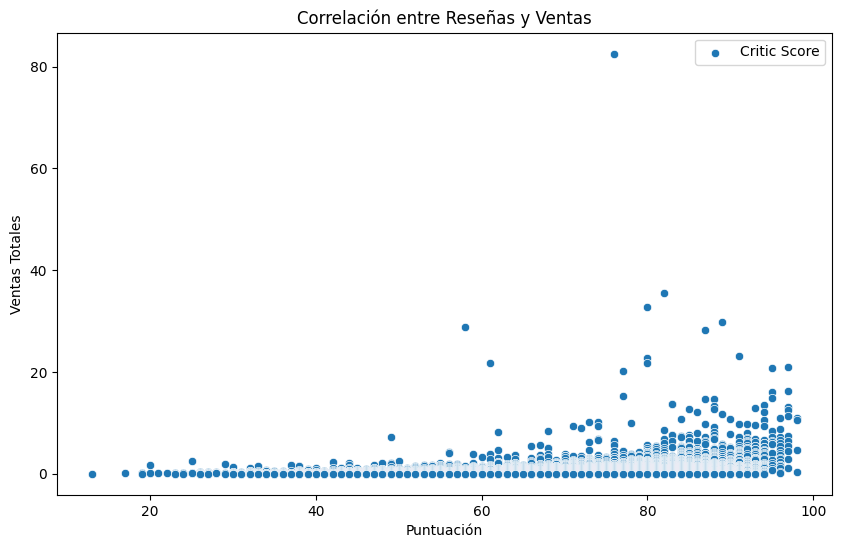

In [22]:
# Seleccionar las columnas de reseñas y ventas
critic_reviews_sales_df = games_df[['critic_score', 'total_sales']]

# Eliminar filas con valores faltantes en las columnas de interés
critic_reviews_sales_df = critic_reviews_sales_df.dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=critic_reviews_sales_df, label='Critic Score')
plt.title('Correlación entre Reseñas y Ventas')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales')
plt.legend()



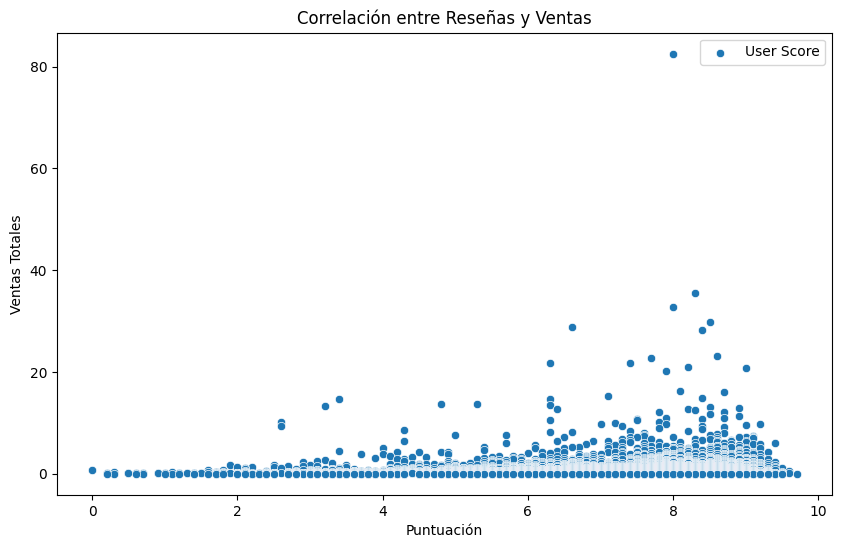

In [23]:
# Seleccionar las columnas de reseñas y ventas
user_reviews_sales_df = games_df[['user_score', 'total_sales']]

# Eliminar filas con valores faltantes en las columnas de interés
user_reviews_sales_df = user_reviews_sales_df.dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=user_reviews_sales_df, label='User Score')
plt.title('Correlación entre Reseñas y Ventas')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales')
plt.legend()

In [24]:
# Calcular la correlación entre reseñas de usuarios y críticos con las ventas totales
correlation = games_df[['user_score', 'critic_score', 'total_sales']].corr().loc['total_sales', ['user_score', 'critic_score']]

correlation

user_score      0.088179
critic_score    0.245507
Name: total_sales, dtype: float64

La correlación entre user_score y total_sales es de aproximadamente 0.088, lo que sugiere una correlación positiva débil. Esto significa que hay una tendencia de que las calificaciones de los usuarios más altas se asocien ligeramente con mayores ventas totales, pero la relación no es muy fuerte. Por otro lado, la correlación entre critic_score y total_sales es de aproximadamente 0.246, lo que indica una correlación positiva moderada. Esto sugiere que hay una relación más fuerte entre las calificaciones de los críticos y las ventas totales en comparación con las calificaciones de los usuarios. Las altas calificaciones de los críticos tienden a estar más asociadas con mayores ventas totales.

### Distribución de juegos por género:

Finalmente, exploraremos la distribución general de los juegos por género, buscando comprender qué géneros son los más rentables y extrayendo conclusiones sobre las características distintivas de los géneros con ventas altas y bajas.

In [25]:
# Agrupar el DataFrame por género y calcular la suma de las ventas totales para cada género
sales_by_genre = games_df.groupby(['genre'])['total_sales'].sum()

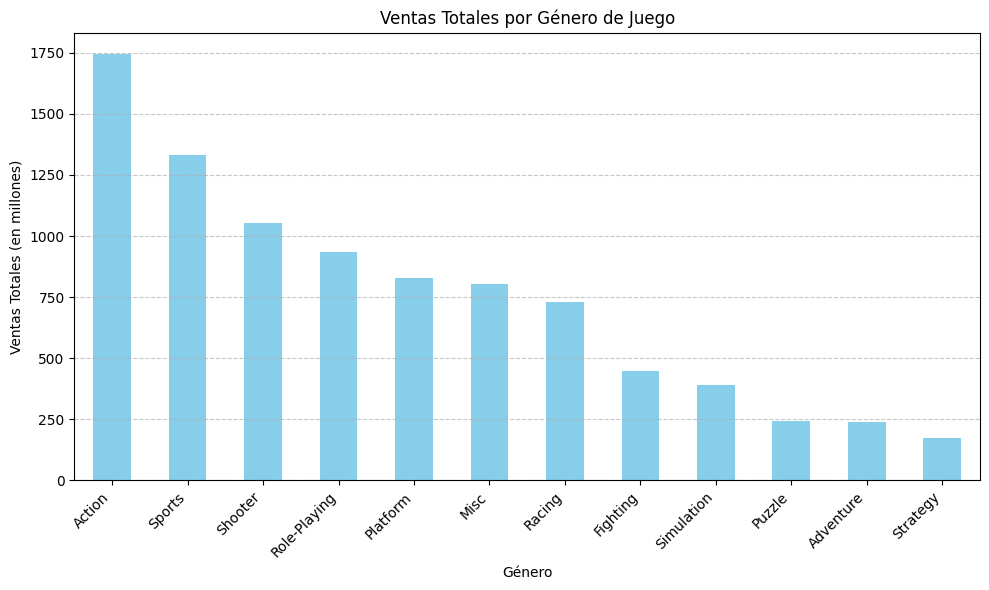

In [26]:
# Ordenar el DataFrame por las ventas totales en orden descendente
sales_by_genre_sorted = sales_by_genre.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sales_by_genre_sorted.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Ventas Totales por Género de Juego')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de rejilla en el eje y

# Mostrar el gráfico
plt.tight_layout()

Al analizar las ventas por género, se observa una clara preferencia por los juegos que ofrecen experiencias más accesibles y menos exigentes cognitivamente. Los géneros de acción, deportes y disparos destacan en términos de ventas totales, sugiriendo que los consumidores parecen inclinarse hacia experiencias de juego que no requieren un pensamiento profundo o analítico. Esta preferencia por los juegos de menor complejidad puede reflejar la demanda de entretenimiento más inmediato y emocionante entre los compradores de videojuegos, lo que enfatiza la importancia de ofrecer experiencias de juego atractivas y accesibles para satisfacer las necesidades del mercado.

### Creación de Perfil de Usuario por Región

#### Distribución de las plataformas más populares por región

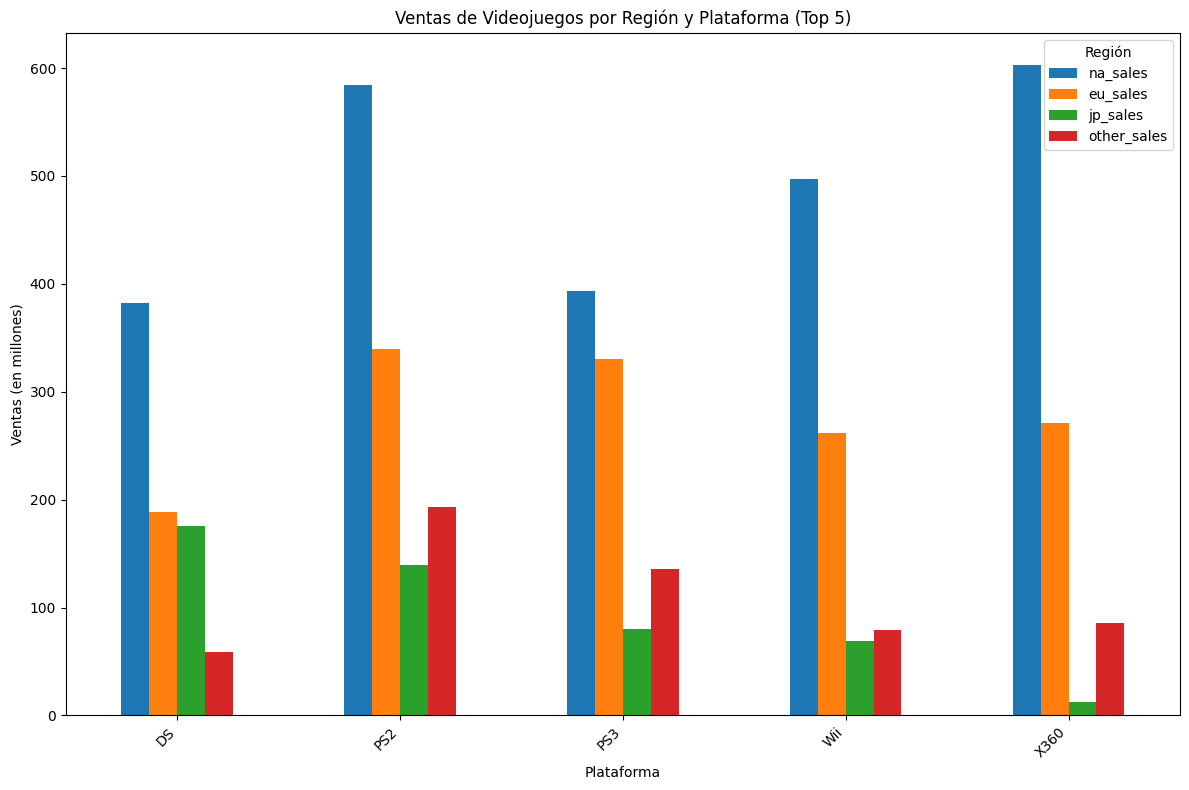

In [27]:
# Seleccionar las 5 plataformas más populares
top_platforms = games_df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filtrar el DataFrame original para incluir solo las ventas de las 5 plataformas más populares
top_platforms_sales = games_df[games_df['platform'].isin(top_platforms)]

# Sumar las ventas por región para cada plataforma
sales_by_region = top_platforms_sales.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Graficar las ventas por región
sales_by_region.plot(kind='bar', figsize=(12, 8))

# Personalizar el gráfico
plt.title('Ventas de Videojuegos por Región y Plataforma (Top 5)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.legend(title='Región')

# Mostrar el gráfico
plt.tight_layout()

En el gráfico se puede observar que las consolas más populares son X360, PS2, Wii, PS3 y DS. Las barras representan la distribución de sus ventas en cada región.


#### Distribución de los géneros más populares por región

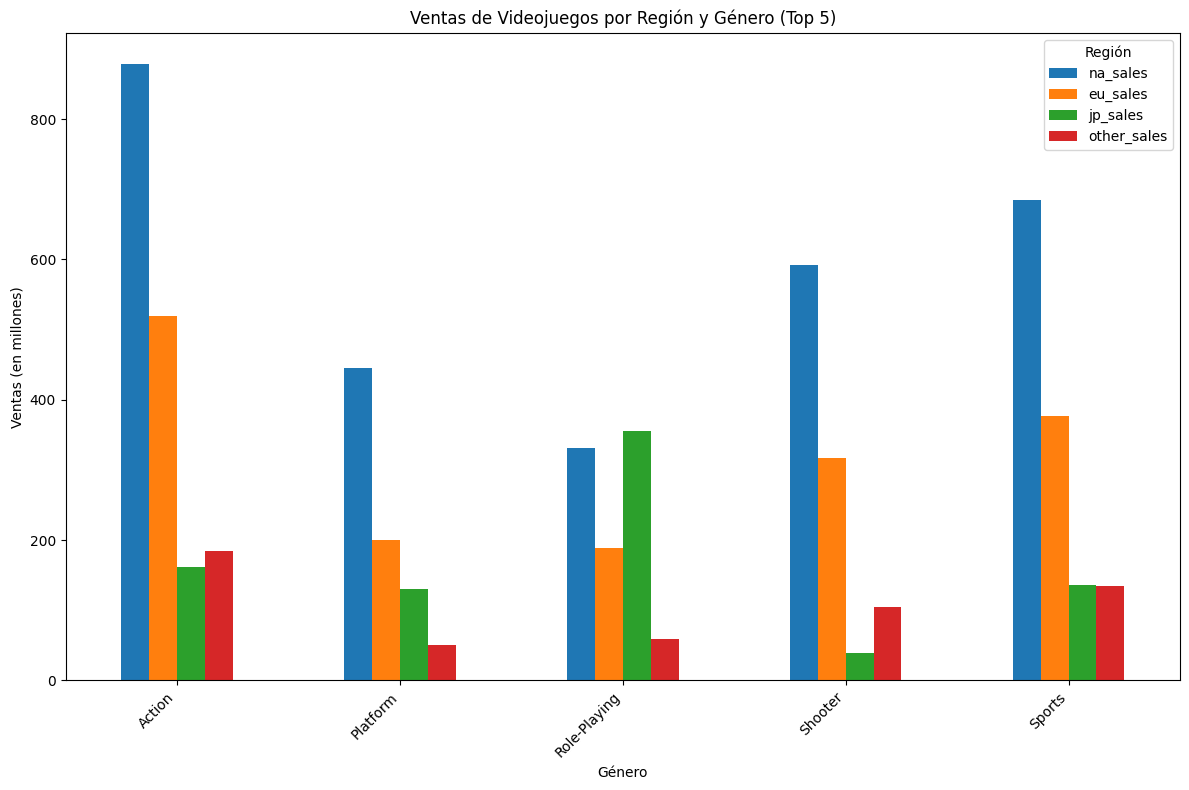

In [28]:
# Calcular las ventas totales por región y género
sales_by_genre_region = games_df.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Seleccionar los 5 géneros principales basados en las ventas totales
top_genres = sales_by_genre_region.sum(axis=1).nlargest(5).index

# Filtrar el DataFrame original para incluir solo las filas correspondientes a los 5 géneros principales
top_genres_df = games_df[games_df['genre'].isin(top_genres)]

# Calcular las ventas totales por región y género para los 5 géneros principales
sales_by_genre_region_top = top_genres_df.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Graficar las ventas por región y género para los 5 géneros principales
sales_by_genre_region_top.plot(kind='bar', figsize=(12, 8))

# Personalizar el gráfico
plt.title('Ventas de Videojuegos por Región y Género (Top 5)')
plt.xlabel('Género')
plt.ylabel('Ventas (en millones)')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.legend(title='Región')

# Mostrar el gráfico
plt.tight_layout()

En el gráfico se pueden observar los 5 géneros más populares y su distribución en cada región: Acción, Deportes, Shooter (disparos), Plataforma y Rol (o Juegos de Rol).

#### Impacto de las Clasificaciones de ESRB en Ventas

In [29]:
# Codificamos la variable categórica 'rating' utilizando one-hot encoding
encoded_ratings = pd.get_dummies(games_df['rating'])

# Definimos las columnas de ventas que queremos analizar
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Inicializamos un diccionario para almacenar las correlaciones
correlations = {}

# Iteramos sobre cada región de ventas
for region in sales_columns:
    # Extraemos las ventas de la región actual
    region_sales = games_df[region].values
    
    # Inicializamos una lista para almacenar las correlaciones de la región actual con cada clasificación de ESRB
    region_corr = []
    
    # Iteramos sobre cada clasificación de ESRB
    for column in encoded_ratings.columns:
        # Extraemos la columna de clasificación de ESRB actual
        rating_column = encoded_ratings[column].values
        
        # Calculamos la correlación entre las ventas de la región actual y la clasificación de ESRB actual
        corr = np.corrcoef(region_sales, rating_column)[0, 1]
        
        # Agregamos la correlación al listado de correlaciones de la región actual
        region_corr.append(corr)
    
    # Almacenamos las correlaciones de la región actual en el diccionario de correlaciones
    correlations[region] = region_corr
    
# Mostramos las correlaciones calculadas
for region, corr in correlations.items():
    print(f"Correlaciones entre clasificaciones de ESRB y ventas en {region}:")
    for i, column in enumerate(encoded_ratings.columns):
        print(f"{column}: {corr[i]}")

                    

Correlaciones entre clasificaciones de ESRB y ventas en na_sales:
AO: 0.009475252418966424
E: 0.04176441771540923
E10+: -0.005453057363450319
EC: -0.0019399701094370892
K-A: 0.009715525620660345
M: 0.0850717590561625
RP: -0.004337353026223902
T: -0.0038732588846650227
Correlaciones entre clasificaciones de ESRB y ventas en eu_sales:
AO: 0.007145127494647628
E: 0.036655514979899564
E10+: -0.007445447235563703
EC: -0.005708799943657908
K-A: -0.0014656548912911783
M: 0.10502197148673338
RP: -0.003151554030180218
T: -0.0007756008295686226
Correlaciones entre clasificaciones de ESRB y ventas en jp_sales:
AO: -0.0019439175482046094
E: -0.05070378957584874
E10+: -0.04864528953374968
EC: -0.005499380841647136
K-A: 0.017745282135499314
M: -0.037974857685011736
RP: -0.003367165423027324
T: -0.03979030846090155
Correlaciones entre clasificaciones de ESRB y ventas en other_sales:
AO: 0.001767086043054534
E: 0.03402883817825185
E10+: 0.007279293231831129
EC: -0.003936650952013504
K-A: -0.0026794113

Las correlaciones calculadas indican la fuerza y la dirección de la relación entre las clasificaciones de ESRB y las ventas en cada región específica:

__Ventas en América del Norte (na_sales):__

Las clasificaciones de ESRB tienen una correlación positiva débil con las ventas en América del Norte, siendo la clasificación "M" (Mature) la que muestra la correlación más alta.
Esto sugiere que los juegos con clasificación "M" tienden a tener mayores ventas en América del Norte.

__Ventas en Europa (eu_sales):__

Las clasificaciones de ESRB también tienen una correlación positiva débil con las ventas en Europa, siendo nuevamente la clasificación "M" la que muestra la correlación más alta.
Al igual que en América del Norte, esto sugiere que los juegos con clasificación "M" tienden a tener mayores ventas en Europa.

__Ventas en Japón (jp_sales):__

En contraste con América del Norte y Europa, las clasificaciones de ESRB muestran correlaciones negativas con las ventas en Japón, siendo las clasificaciones "E" y "E10+" las que tienen correlaciones más negativas.
Esto sugiere que los juegos con clasificaciones más orientadas a audiencias jóvenes tienden a tener ventas más bajas en Japón.

__Ventas en otras regiones (other_sales):__

Las correlaciones son similares a las observadas en América del Norte y Europa, con una correlación positiva débil entre las clasificaciones de ESRB y las ventas en otras regiones, siendo la clasificación "M" nuevamente la que muestra la correlación más alta.

## Prueba de Hipótesis

__Interpretación de la Prueba t y Valores p__

La prueba t de muestras independientes es adecuada para comparar las medias de dos grupos en diferentes situaciones, ofreciendo una evaluación de la significancia estadística de cualquier diferencia observada. Este método se aplica en ambos casos para este tipo de análisis, proporcionando una medida confiable de la diferencia entre las calificaciones promedio de los usuarios, ya sea entre plataformas de juegos o entre géneros específicos. Al utilizar un valor p para evaluar la significancia estadística de los resultados, se establece un umbral de significancia, denotado como α, comúnmente fijado en 0.05. Si el valor p calculado es menor que α, se rechaza la hipótesis nula, lo que indica que hay suficiente evidencia para respaldar la hipótesis alternativa de que existe una diferencia significativa entre los grupos comparados. Por el contrario, si el valor p es mayor que α, se retiene la hipótesis nula y no se puede concluir que exista una diferencia significativa entre los grupos.

### Hipótesis 1:
    
__H0__: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

__H1__: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC varían significativamente.

En este caso, se realizará una prueba t de muestras independientes para comparar las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC:

**Análisis y Ejecución**

In [30]:
# Obtener los datos de las plataformas Xbox One y PC
xbox_df = games_df[games_df["platform"] == "XOne"]
pc_df = games_df[games_df["platform"] == "PC"]

# Eliminar filas con datos faltantes en la columna "user_score"
xbox_df = xbox_df.dropna(subset=["user_score"])
pc_df = pc_df.dropna(subset=["user_score"])

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_test = stats.levene(xbox_df["user_score"], pc_df["user_score"])

print(f"Valor p de la prueba de Levene: {levene_test.pvalue}")

# Definir nivel de significancia alpha
alpha = 0.05

# Interpretar el resultado de la prueba de Levene
if levene_test.pvalue > alpha:
    print("No podemos rechazar la hipótesis nula de igualdad de varianzas.")
    equal_var = True  # Se cumple el supuesto de varianzas iguales para la prueba t
else:
    print("Rechazamos la hipótesis nula de igualdad de varianzas.")
    equal_var = False  # No se cumple el supuesto de varianzas iguales para la prueba t

Valor p de la prueba de Levene: 0.2693951512047048
No podemos rechazar la hipótesis nula de igualdad de varianzas.


In [31]:
# Realizar la prueba t de muestras independientes
results = stats.ttest_ind(xbox_df["user_score"], pc_df["user_score"], equal_var=equal_var)

# Interpretar el resultado de la prueba t
print('Valor p de la prueba t: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.'")
else:
    print("No podemos rechazar la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.'")

Valor p de la prueba t:  1.3896435533548819e-05
Rechazamos la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.'


El valor p extremadamente bajo (1.39e-05) proporciona evidencia sólida para rechazar la hipótesis nula de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. Por lo tanto, podemos concluir con confianza que hay una diferencia significativa en las calificaciones promedio de los usuarios entre estas dos plataformas.








### Hipótesis 2:

__H0__: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

__H1__: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

En este caso también se llevará a cabo una prueba t, aunque se trata de una prueba t de muestras independientes para comparar las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

In [32]:
# Filtrar el DataFrame para incluir solo las filas donde los géneros sean acción y deportes
action_df = games_df[games_df["genre"] == "Action"]
sports_df = games_df[games_df["genre"] == "Sports"]

# Eliminar filas con datos faltantes en la columna "user_score"
action_df = action_df.dropna(subset=["user_score"])
sports_df = sports_df.dropna(subset=["user_score"])

# Realizar la prueba de Levene para verificar la igualdad de varianzas
levene_test_action_sports = stats.levene(action_df["user_score"], sports_df["user_score"])

print(f"Valor p de la prueba de Levene (Acción vs Deportes): {levene_test_action_sports.pvalue}")

# Interpretar el resultado de la prueba de Levene
if levene_test_action_sports.pvalue > alpha:
    print("No podemos rechazar la hipótesis nula de igualdad de varianzas (Acción vs Deportes).")
    equal_var_action_sports = True  # Se cumple el supuesto de varianzas iguales para la prueba t
else:
    print("Rechazamos la hipótesis nula de igualdad de varianzas (Acción vs Deportes).")
    equal_var_action_sports = False  # No se cumple el supuesto de varianzas iguales para la prueba t

Valor p de la prueba de Levene (Acción vs Deportes): 0.0001736640672727649
Rechazamos la hipótesis nula de igualdad de varianzas (Acción vs Deportes).


In [33]:
# Realizar la prueba t de muestras independientes
results_action_sports = stats.ttest_ind(action_df["user_score"], sports_df["user_score"], equal_var=equal_var_action_sports)

# Interpretar el resultado de la prueba t
print('Valor p de la prueba t (Acción vs Deportes): ', results_action_sports.pvalue)

if results_action_sports.pvalue < alpha:
    print("Rechazamos la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.'")
else:
    print("No podemos rechazar la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.'")

Valor p de la prueba t (Acción vs Deportes):  0.11483818791498288
No podemos rechazar la hipótesis nula que dice 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.'


Con un valor p de 0.114, que supera el nivel de significancia típicamente utilizado de 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. Por lo tanto, en base a estos resultados, no podemos concluir que haya una diferencia significativa en las calificaciones promedio de los usuarios entre estos dos géneros.

## Conclusiones Generales

### Tendencias de ventas de las plataformas de videojuegos:

El análisis del gráfico revela patrones interesantes en las tendencias de ventas de las plataformas de videojuegos más populares desde 2011 hasta 2016. Mientras que el PS4 y el Xbox One mostraron un crecimiento significativo en ventas hasta 2015, el 3DS experimentó una disminución constante desde su lanzamiento. A pesar de su antigüedad, la PC lidera en ventas en 2016, aunque muestra una tendencia decreciente desde 2011. Por otro lado, el PSV exhibió un aumento inicial en ventas seguido de una tendencia a la baja en los años posteriores. Este análisis destaca la importancia del lanzamiento oportuno de nuevas plataformas para mantener la relevancia en el mercado de los videojuegos.

### Preferencias de género en los videojuegos:

El análisis de los géneros de los videojuegos revela una preferencia por experiencias de juego accesibles y menos exigentes cognitivamente, como Acción, Deportes y Disparos. Esto sugiere una demanda de entretenimiento inmediato y emocionante entre los consumidores de videojuegos. Sin embargo, también resalta la necesidad de diversificar la oferta para satisfacer las preferencias de una amplia gama de consumidores.

### Correlaciones entre las clasificaciones de ESRB y las ventas en diferentes regiones:

Las correlaciones entre las clasificaciones de ESRB y las ventas en diferentes regiones proporcionan información adicional sobre las tendencias de compra de videojuegos. Mientras que en América del Norte y Europa las clasificaciones "M" están positivamente correlacionadas con las ventas, en Japón, las clasificaciones "E" y "E10+" muestran correlaciones negativas. Esto sugiere diferencias culturales en las preferencias de los consumidores de videojuegos en diferentes regiones.

### Resultados de las pruebas de hipótesis:

El valor p extremadamente bajo para la comparación entre las plataformas Xbox One y PC proporciona una sólida evidencia para rechazar la hipótesis nula y concluir que hay una diferencia significativa en las calificaciones promedio de los usuarios entre estas dos plataformas. Por otro lado, el valor p más alto para la comparación entre los géneros de Acción y Deportes no alcanza el nivel de significancia típicamente utilizado, lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que las calificaciones promedio de los usuarios para estos dos géneros son iguales.